In [12]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
# 为了正常显示中文
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.size'] = 12  # 字体大小
# https://zhuanlan.zhihu.com/p/428466235

In [2]:
datapath = './data/winequality_red.csv'
dataframe = pd.read_csv(datapath)
quality = dataframe.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(dataframe, quality, test_size=0.2, random_state=0)

In [15]:
params = {'n_estimators': 500, # 弱分类器的个数
          'max_depth': 5,       # 弱分类器（CART回归树）的最大深度
          'min_samples_split': 5, # 分裂内部节点所需的最小样本数
          'learning_rate': 0.05,  # 学习率
          'loss': 'ls'}           # 损失函数：均方误差损失函数
GBDTreg = GradientBoostingRegressor(**params)
GBDTreg.fit(X_train, y_train)

C:\Users\fesia\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=5,
                          min_samples_split=5, n_estimators=500)

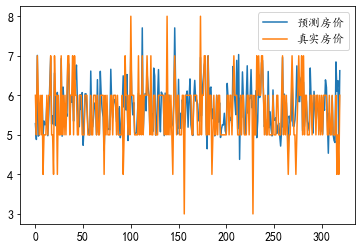

In [16]:
y_predict = GBDTreg.predict(X_test)
plt.plot(y_predict, label='预测房价')
plt.plot(y_test.to_numpy(), label='真实房价')
plt.legend()

In [17]:
# 计算预测房价与真实房价之间的均方误差
mse = mean_squared_error(y_test, y_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.3598


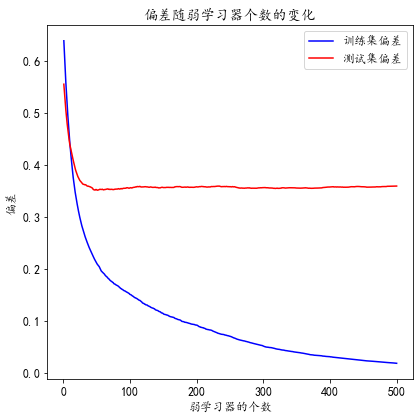

In [18]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GBDTreg.staged_predict(X_test)):
    test_score[i] = GBDTreg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('偏差随弱学习器个数的变化')
plt.plot(np.arange(params['n_estimators']) + 1, GBDTreg.train_score_, 'b-',
         label='训练集偏差')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='测试集偏差')
plt.legend(loc='upper right')
plt.xlabel('弱学习器的个数')
plt.ylabel('偏差')
fig.tight_layout()

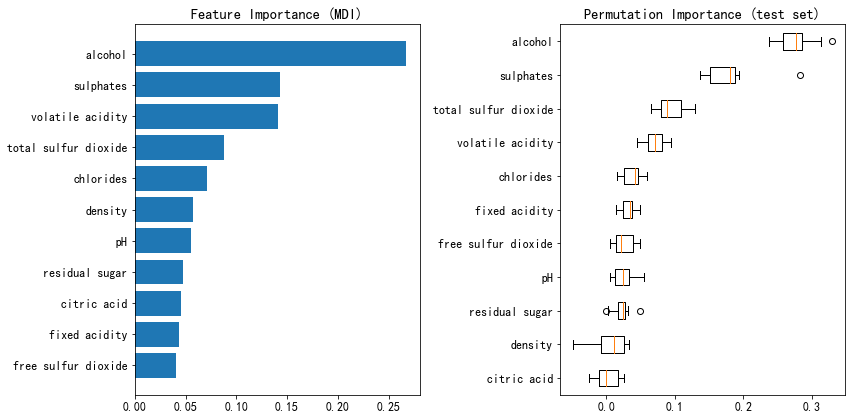

In [25]:
feature_importance = GBDTreg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(dataframe.keys())[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(GBDTreg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(dataframe.keys())[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [26]:
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
